In [1]:
!pip install jax jaxlib

In [16]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import matplotlib.pyplot as plt
# Generate some synthetic data for linear regression
rng_key = jax.random.PRNGKey(0)
X = jax.random.normal(rng_key, (100, 1))
y = 2 * X + 3 + jax.random.normal(rng_key, (100, 1)) * 0.1  # Add some noise



In [19]:

# Define the loss function for linear regression (mean squared error)
def mse_loss(params, X, y):
    y_pred = jnp.dot(X, params[0]) + params[1]
    return jnp.mean((y_pred - y) ** 2)

# Define the gradient of the loss function using JAX's autograd
grad_loss = grad(mse_loss)


# Perform gradient descent optimization
def gradient_descent(params, X, y, learning_rate=0.01, num_epochs=1000):
    cost_history=jnp.zeros(num_epochs)
    for epoch in range(num_epochs):
        gradient = grad_loss(params, X, y)
        params = [param - learning_rate * grad_param for param, grad_param in zip(params, gradient)]

        # Calculate and print the loss
        loss = mse_loss(params, X, y)
        cost_history=cost_history.at[epoch].set(mse_loss(params, X, y))
        print(f"Epoch {epoch + 1}, Loss: {loss}")

    return params,cost_history



In [20]:
len(y)

100

In [21]:
# Initialize parameters (slope and intercept)
params = [jnp.zeros((1, 1)), jnp.zeros((1,))]

# Optimize parameters using gradient descent
params,cost_history = gradient_descent(params, X, y)

# Extract the slope and intercept
slope, intercept = params

print("Optimized slope:", slope)
print("Optimized intercept:", intercept)

Epoch 1, Loss: 13.391045570373535
Epoch 2, Loss: 12.83871078491211
Epoch 3, Loss: 12.309165954589844
Epoch 4, Loss: 11.801470756530762
Epoch 5, Loss: 11.314724922180176
Epoch 6, Loss: 10.848061561584473
Epoch 7, Loss: 10.400653839111328
Epoch 8, Loss: 9.971705436706543
Epoch 9, Loss: 9.560454368591309
Epoch 10, Loss: 9.16617202758789
Epoch 11, Loss: 8.788156509399414
Epoch 12, Loss: 8.425737380981445
Epoch 13, Loss: 8.07827091217041
Epoch 14, Loss: 7.745137691497803
Epoch 15, Loss: 7.4257493019104
Epoch 16, Loss: 7.119537353515625
Epoch 17, Loss: 6.825958251953125
Epoch 18, Loss: 6.54448938369751
Epoch 19, Loss: 6.274632453918457
Epoch 20, Loss: 6.015908241271973
Epoch 21, Loss: 5.767855644226074
Epoch 22, Loss: 5.530036449432373
Epoch 23, Loss: 5.302027702331543
Epoch 24, Loss: 5.083423137664795
Epoch 25, Loss: 4.873836994171143
Epoch 26, Loss: 4.6728949546813965
Epoch 27, Loss: 4.4802422523498535
Epoch 28, Loss: 4.295535564422607
Epoch 29, Loss: 4.118447303771973
Epoch 30, Loss: 3.94

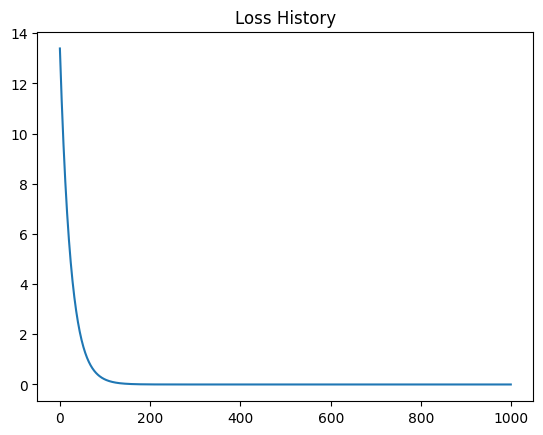

In [23]:
plt.plot(jnp.arange(0,1000),cost_history)
plt.title("Loss History")
plt.show()

In [25]:
def model(x,y):
  return x.dot(y)

In [31]:
theta=jnp.array([[slope[0], intercept]])

In [33]:
theta=jnp.squeeze(theta)
theta=theta.reshape(2,-1)

In [35]:
X=jnp.hstack((X,jnp.ones((X.shape[0],1))))

In [38]:
result=model(X,theta)

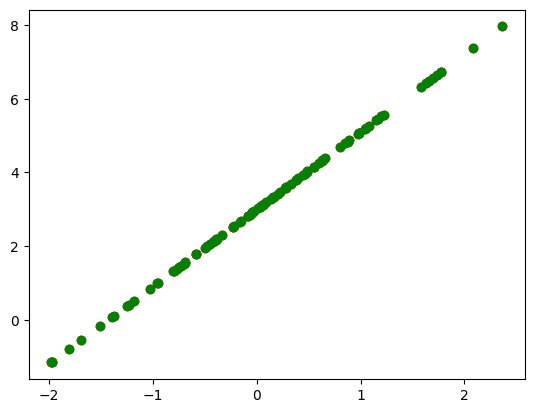

In [42]:
plt.scatter(X[:,0],y,c='r')
plt.scatter(X[:,0],result,c='g')